---
# April 22, 2020 EV Stata Kernel with binary logit and ordered probit
---
* Name: Jikhan Jeong
* Ref: https://kylebarron.dev/stata_kernel/ (stata kernel)
* Do: Feb 2, 2020 EV 184 sample.do
---
* Marginal effects are measured at mode (not mean, because the most of variables are categorical or dummy)
---

### Download package
* cap ssc install package_name
---

In [1]:
# cap ssc install estout

### Load data
* use "data.dta", clear

In [3]:
use "2019_12_04_ev184.dta", clear

In [2]:
%globals

(note: showing first line of global values; run with --verbose)

S_FNDATE:                    4 Dec 2019 23:57
S_FN:                       2019_12_04_ev184.dta
stata_kernel_graph_counter: 0
S_ADO:                      BASE;SITE;.;PERSONAL;PLUS;OLDPLACE;`"/home/jikhan.jeong/.local/lib/python3.7/site-packages/stata_kernel/ado"'
S_level:                    95
F1:                         help advice;
F2:                         describe;
F7:                         save
F8:                         use
S_StataMP:                  MP
S_StataSE:                  SE
S_CONSOLE:                  console
S_FLAVOR:                   Intercooled
S_OS:                       Unix
S_MACH:                     PC (64-bit x86-64)


---
# 0. Mode Analysis
---
* before: 1(%) 2 3 4 5 
* After : 1(%) 2 3 4 5 
---

In [45]:
* 64.13% says want to buy EVs
tab y


          y |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         66       35.87       35.87
          1 |        118       64.13      100.00
------------+-----------------------------------
      Total |        184      100.00


In [25]:
* age mode: 2 ( 93       50.54%)
tab age


        age |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         24       13.04       13.04
          2 |         93       50.54       63.59
          3 |         51       27.72       91.30
          4 |         15        8.15       99.46
          5 |          1        0.54      100.00
------------+-----------------------------------
      Total |        184      100.00


In [26]:
* gender mode: 1 (male) (147  79.89% )
tab gender


     gender |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         37       20.11       20.11
          1 |        147       79.89      100.00
------------+-----------------------------------
      Total |        184      100.00


In [28]:
* marriage mode: single 1 (73       39.67%)
tab marriage


   marriage |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        111       60.33       60.33
          1 |         73       39.67      100.00
------------+-----------------------------------
      Total |        184      100.00


In [30]:
* job type: student  10        
tab student1  


   student1 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        174       94.57       94.57
          1 |         10        5.43      100.00
------------+-----------------------------------
      Total |        184      100.00


In [31]:
* job type: company_mant   5       
tab company_man2


company_man |
          2 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        179       97.28       97.28
          1 |          5        2.72      100.00
------------+-----------------------------------
      Total |        184      100.00


In [32]:
* job type: public_officer3    89       ** highest due to early statge government driven deployment programs
tab public_off~3


public_offi |
       cer3 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         95       51.63       51.63
          1 |         89       48.37      100.00
------------+-----------------------------------
      Total |        184      100.00


In [33]:
* job type: cpublic_officer3    51    
tab profession4


profession4 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        133       72.28       72.28
          1 |         51       27.72      100.00
------------+-----------------------------------
      Total |        184      100.00


In [34]:
* job type: public_officer3    17   
tab researcher5


researcher5 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        167       90.76       90.76
          1 |         17        9.24      100.00
------------+-----------------------------------
      Total |        184      100.00


In [35]:
* Learn mode: 3  (28       69.57%) 
tab  learn


      Learn |      Freq.     Percent        Cum.
------------+-----------------------------------
          2 |          8        4.35        4.35
          3 |        128       69.57       73.91
          4 |         48       26.09      100.00
------------+-----------------------------------
      Total |        184      100.00


In [29]:
* income mode: 1  20-30 million (76       41.30%)
tab   income   


     income |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         76       41.30       41.30
          2 |         46       25.00       66.30
          3 |         22       11.96       78.26
          4 |         20       10.87       89.13
          5 |         11        5.98       95.11
          6 |          9        4.89      100.00
------------+-----------------------------------
      Total |        184      100.00


In [39]:
* average distrance mode:  3, (42       22.83%)
tab avg_distance


avg_distanc |
          e |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         27       14.67       14.67
          2 |         34       18.48       33.15
          3 |         42       22.83       55.98
          4 |         34       18.48       74.46
          5 |         33       17.93       92.39
          6 |         14        7.61      100.00
------------+-----------------------------------
      Total |        184      100.00


In [40]:
* frequency of usage of ev: 2        (64       34.78%)
tab   freq_use_ev  


freq_use_ev |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         10        5.43        5.43
          2 |         64       34.78       40.22
          3 |         50       27.17       67.39
          4 |         25       13.59       80.98
          5 |         24       13.04       94.02
          6 |         11        5.98      100.00
------------+-----------------------------------
      Total |        184      100.00


In [41]:
* club type mode: 96 club_kepco2 = 1
tab club_kepco2


club_kepco2 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         88       47.83       47.83
          1 |         96       52.17      100.00
------------+-----------------------------------
      Total |        184      100.00


In [42]:
* club type mode: 51 club_jeju3 = 0
tab club_jeju3 


 club_jeju3 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        133       72.28       72.28
          1 |         51       27.72      100.00
------------+-----------------------------------
      Total |        184      100.00


In [43]:
* mode of ownership ev : mode = 0
tab ev_owner 


   ev_owner |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        166       90.22       90.22
          1 |         18        9.78      100.00
------------+-----------------------------------
      Total |        184      100.00


In [44]:
* saving free mode = 1 (164       89.13%)
tab  saving_free 


saving_free |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |         20       10.87       10.87
          1 |        164       89.13      100.00
------------+-----------------------------------
      Total |        184      100.00


---
### cons_short_dis
---

In [7]:
* a_cons_short_dis mode =  4  (61       33.15%)
tab a_cons_short_dis


a_cons_shor |
      t_dis |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          7        3.80        3.80
          2 |         18        9.78       13.59
          3 |         45       24.46       38.04
          4 |         61       33.15       71.20
          5 |         53       28.80      100.00
------------+-----------------------------------
      Total |        184      100.00


In [8]:
* b_b_cons_short_dis mode =  4,  ( 41.85       65.76%)
tab b_cons_short_dis


b_cons_shor |
      t_dis |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          5        2.72        2.72
          2 |          9        4.89        7.61
          3 |         30       16.30       23.91
          4 |         77       41.85       65.76
          5 |         63       34.24      100.00
------------+-----------------------------------
      Total |        184      100.00


In [9]:
* g_cons_short_dis mode  0, (83       45.11%) 
tab g_cons_short_dis


g_cons_shor |
      t_dis |      Freq.     Percent        Cum.
------------+-----------------------------------
         -3 |          5        2.72        2.72
         -2 |         13        7.07        9.78
         -1 |         51       27.72       37.50
          0 |         83       45.11       82.61
          1 |         24       13.04       95.65
          2 |          5        2.72       98.37
          3 |          3        1.63      100.00
------------+-----------------------------------
      Total |        184      100.00


---
### cons_as
---

In [13]:
* a_cons_as mode: 4, (54       29.35%)
tab a_cons_as


  a_cons_as |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         16        8.70        8.70
          2 |         32       17.39       26.09
          3 |         48       26.09       52.17
          4 |         54       29.35       81.52
          5 |         34       18.48      100.00
------------+-----------------------------------
      Total |        184      100.00


In [14]:
* b_cons_as mode: 3, (60       32.61)
tab b_cons_as


  b_cons_as |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          5        2.72        2.72
          2 |         22       11.96       14.67
          3 |         60       32.61       47.28
          4 |         54       29.35       76.63
          5 |         43       23.37      100.00
------------+-----------------------------------
      Total |        184      100.00


In [15]:
* g_cons_as mode: 0, (88       47.83)
tab g_cons_as


  g_cons_as |      Freq.     Percent        Cum.
------------+-----------------------------------
         -3 |          7        3.80        3.80
         -2 |         20       10.87       14.67
         -1 |         36       19.57       34.24
          0 |         88       47.83       82.07
          1 |         21       11.41       93.48
          2 |         10        5.43       98.91
          3 |          2        1.09      100.00
------------+-----------------------------------
      Total |        184      100.00


---
### cons_charge_fee
---

In [16]:
* a_cons_charge_fee mode: 3 (60       32.61)
tab a_cons_charge_fee


a_cons_char |
     ge_fee |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         30       16.30       16.30
          2 |         46       25.00       41.30
          3 |         60       32.61       73.91
          4 |         32       17.39       91.30
          5 |         16        8.70      100.00
------------+-----------------------------------
      Total |        184      100.00


In [17]:
* b_cons_charge_fee: 3  (64       34.78%)
tab b_cons_charge_fee


b_cons_char |
     ge_fee |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         15        8.15        8.15
          2 |         34       18.48       26.63
          3 |         64       34.78       61.41
          4 |         48       26.09       87.50
          5 |         23       12.50      100.00
------------+-----------------------------------
      Total |        184      100.00


In [18]:
* g_cons_charge_fee mode: 0 (79       42.93%)
tab g_cons_charge_fee


g_cons_char |
     ge_fee |      Freq.     Percent        Cum.
------------+-----------------------------------
         -4 |          1        0.54        0.54
         -3 |          4        2.17        2.72
         -2 |         21       11.41       14.13
         -1 |         50       27.17       41.30
          0 |         79       42.93       84.24
          1 |         24       13.04       97.28
          2 |          3        1.63       98.91
          3 |          2        1.09      100.00
------------+-----------------------------------
      Total |        184      100.00


---
### cons_num_charge_lack
---

In [19]:
*  a_cons_num_charge_lack mode: 5, (83       45.11%)
tab a_cons_num_charge_lack


a_cons_num_ |
charge_lack |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          5        2.72        2.72
          2 |         10        5.43        8.15
          3 |         28       15.22       23.37
          4 |         58       31.52       54.89
          5 |         83       45.11      100.00
------------+-----------------------------------
      Total |        184      100.00


In [20]:
* b_cons_num_charge_lack mode: 5 (96       52.17%)
tab b_cons_num_charge_lack


b_cons_num_ |
charge_lack |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          2        1.09        1.09
          2 |          3        1.63        2.72
          3 |         28       15.22       17.93
          4 |         55       29.89       47.83
          5 |         96       52.17      100.00
------------+-----------------------------------
      Total |        184      100.00


In [21]:
* g_cons_num_charge_lack mode: 0 (108       58.70%)
tab g_cons_num_charge_lack


g_cons_num_ |
charge_lack |      Freq.     Percent        Cum.
------------+-----------------------------------
         -3 |          1        0.54        0.54
         -2 |         19       10.33       10.87
         -1 |         31       16.85       27.72
          0 |        108       58.70       86.41
          1 |         15        8.15       94.57
          2 |          9        4.89       99.46
          3 |          1        0.54      100.00
------------+-----------------------------------
      Total |        184      100.00


---
### cons_long_charge_time
---

In [22]:
* a_cons_long_charge_time mode: 4, (70       38.04%)
tab a_cons_long_charge_time


a_cons_long |
_charge_tim |
          e |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          5        2.72        2.72
          2 |         12        6.52        9.24
          3 |         37       20.11       29.35
          4 |         70       38.04       67.39
          5 |         60       32.61      100.00
------------+-----------------------------------
      Total |        184      100.00


In [23]:
* b_cons_long_charge_time mode: 4 ( 73       39.67%)
tab b_cons_long_charge_time


b_cons_long |
_charge_tim |
          e |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          4        2.17        2.17
          2 |          3        1.63        3.80
          3 |         32       17.39       21.20
          4 |         73       39.67       60.87
          5 |         72       39.13      100.00
------------+-----------------------------------
      Total |        184      100.00


In [24]:
* g_cons_long_charge_time mode: 0 (103       55.98%)
tab g_cons_long_charge_time


g_cons_long |
_charge_tim |
          e |      Freq.     Percent        Cum.
------------+-----------------------------------
         -3 |          1        0.54        0.54
         -2 |         21       11.41       11.96
         -1 |         32       17.39       29.35
          0 |        103       55.98       85.33
          1 |         20       10.87       96.20
          2 |          4        2.17       98.37
          3 |          1        0.54       98.91
          4 |          2        1.09      100.00
------------+-----------------------------------
      Total |        184      100.00


---
### cons_hill_ride 
---

In [25]:
* a_cons_hill_ride mode: 3, (57       30.98%)
tab a_cons_hill_ride 


a_cons_hill |
      _ride |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         40       21.74       21.74
          2 |         38       20.65       42.39
          3 |         57       30.98       73.37
          4 |         32       17.39       90.76
          5 |         17        9.24      100.00
------------+-----------------------------------
      Total |        184      100.00


In [26]:
* b_cons_hill_ride mode: 4 (54       29.35%)
tab b_cons_hill_ride 


b_cons_hill |
      _ride |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         20       10.87       10.87
          2 |         30       16.30       27.17
          3 |         49       26.63       53.80
          4 |         54       29.35       83.15
          5 |         31       16.85      100.00
------------+-----------------------------------
      Total |        184      100.00


In [27]:
* g_cons_hill_ride mode: 0 ( 77       41.85%)
tab  g_cons_hill_ride 


g_cons_hill |
      _ride |      Freq.     Percent        Cum.
------------+-----------------------------------
         -4 |          4        2.17        2.17
         -3 |          5        2.72        4.89
         -2 |         25       13.59       18.48
         -1 |         50       27.17       45.65
          0 |         77       41.85       87.50
          1 |         16        8.70       96.20
          2 |          5        2.72       98.91
          3 |          1        0.54       99.46
          4 |          1        0.54      100.00
------------+-----------------------------------
      Total |        184      100.00


---
### cons_hac
---

In [28]:
* a_cons_hac mode: 3, (51       27.72%)
tab a_cons_hac


 a_cons_hac |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         26       14.13       14.13
          2 |         27       14.67       28.80
          3 |         51       27.72       56.52
          4 |         47       25.54       82.07
          5 |         33       17.93      100.00
------------+-----------------------------------
      Total |        184      100.00


In [29]:
* b_cons_hac mode: 3 (58       31.52%)
tab b_cons_hac


 b_cons_hac |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         11        5.98        5.98
          2 |         25       13.59       19.57
          3 |         58       31.52       51.09
          4 |         51       27.72       78.80
          5 |         39       21.20      100.00
------------+-----------------------------------
      Total |        184      100.00


In [30]:
* g_cons_hac mode: 0 ( 76       41.30%)
tab g_cons_hac


 g_cons_hac |      Freq.     Percent        Cum.
------------+-----------------------------------
         -4 |          3        1.63        1.63
         -3 |          4        2.17        3.80
         -2 |         16        8.70       12.50
         -1 |         48       26.09       38.59
          0 |         76       41.30       79.89
          1 |         21       11.41       91.30
          2 |         14        7.61       98.91
          3 |          1        0.54       99.46
          4 |          1        0.54      100.00
------------+-----------------------------------
      Total |        184      100.00


---
# Summary Statistics
---

In [31]:
sum y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free 


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
           y |        184    .6413043    .4809263          0          1
         age |        184    2.326087    .8246038          1          5
      gender |        184     .798913    .4019065          0          1
    marriage |        184    .3967391    .4905559          0          1
    student1 |        184    .0543478    .2273213          0          1
-------------+---------------------------------------------------------
company_man2 |        184    .0271739    .1630336          0          1
public_off~3 |        184    .4836957    .5010976          0          1
 profession4 |        184    .2771739    .4488244          0          1
 researcher5 |        184    .0923913    .2903677          0          1
       learn |        184    3.217391    .5084228          2          4
-------------+-------------------------------------------------

In [32]:
sum a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride a_cons_hac


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
a_cons_sho~s |        184    3.733696     1.09632          1          5
   a_cons_as |        184    3.315217    1.209519          1          5
a_cons_cha~e |        184    2.771739    1.174439          1          5
a_cons_num~k |        184    4.108696    1.029154          1          5
a_cons_lon~e |        184    3.913043    1.015209          1          5
-------------+---------------------------------------------------------
a_cons_hil~e |        184    2.717391    1.244231          1          5
  a_cons_hac |        184    3.184783    1.288277          1          5


In [33]:
sum b_cons_short_dis b_cons_as b_cons_charge_fee b_cons_num_charge_lack b_cons_long_charge_time b_cons_hill_ride b_cons_hac


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
b_cons_sho~s |        184           4    .9750998          1          5
   b_cons_as |        184    3.586957    1.057393          1          5
b_cons_cha~e |        184    3.163043     1.11891          1          5
b_cons_num~k |        184    4.304348     .865099          1          5
b_cons_lon~e |        184    4.119565    .9034529          1          5
-------------+---------------------------------------------------------
b_cons_hil~e |        184        3.25    1.229199          1          5
  b_cons_hac |        184    3.445652    1.143899          1          5


In [34]:
sum g_cons_short_dis g_cons_as g_cons_charge_fee g_cons_num_charge_lack g_cons_long_charge_time g_cons_hill_ride g_cons_hac


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
g_cons_sho~s |        184   -.2663043    1.060856         -3          3
   g_cons_as |        184   -.2717391    1.155677         -3          3
g_cons_cha~e |        184   -.3913043    1.075881         -4          3
g_cons_num~k |        184   -.1956522     .960864         -3          3
g_cons_lon~e |        184   -.2065217     1.03002         -3          4
-------------+---------------------------------------------------------
g_cons_hil~e |        184   -.5326087    1.209716         -4          4
  g_cons_hac |        184   -.2608696    1.248996         -4          4


---
# <font color= blue> 1. Pre-analysis: correlation among concerns after before and gap
* No strong correlation among all concern variables, because none of correation is higher than 0.6
* The concern on driving up-hill has the highest correlation with the concern on HAC
---

In [15]:
corr a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride a_cons_hac

(obs=184)

             | a_con~is a_con~as a_con~ee a_cons~k a_con~me a_con~de a_cons~c
-------------+---------------------------------------------------------------
a_cons_sho~s |   1.0000
   a_cons_as |   0.1296   1.0000
a_cons_cha~e |   0.1265   0.2894   1.0000
a_cons_num~k |   0.4084   0.0470   0.2105   1.0000
a_cons_lon~e |   0.3768   0.2094   0.2033   0.5321   1.0000
a_cons_hil~e |   0.0206   0.3972   0.4044   0.0071   0.1492   1.0000
  a_cons_hac |   0.3059   0.3727   0.2989   0.1414   0.2589   0.5032   1.0000



In [16]:
corr b_cons_short_dis b_cons_as b_cons_charge_fee b_cons_num_charge_lack b_cons_long_charge_time b_cons_hill_ride b_cons_hac

(obs=184)

             | b_con~is b_con~as b_con~ee b_cons~k b_con~me b_con~de b_cons~c
-------------+---------------------------------------------------------------
b_cons_sho~s |   1.0000
   b_cons_as |   0.2544   1.0000
b_cons_cha~e |   0.0200   0.1265   1.0000
b_cons_num~k |   0.2591   0.1501   0.1686   1.0000
b_cons_lon~e |   0.4342   0.3323   0.1158   0.4426   1.0000
b_cons_hil~e |   0.1778   0.2144   0.2682   0.1233   0.2534   1.0000
  b_cons_hac |   0.2792   0.2885   0.0454   0.1217   0.2601   0.5305   1.0000



In [17]:
corr g_cons_short_dis g_cons_as g_cons_charge_fee g_cons_num_charge_lack g_cons_long_charge_time g_cons_hill_ride g_cons_hac

(obs=184)

             | g_con~is g_con~as g_con~ee g_cons~k g_con~me g_con~de g_cons~c
-------------+---------------------------------------------------------------
g_cons_sho~s |   1.0000
   g_cons_as |   0.0565   1.0000
g_cons_cha~e |   0.2050   0.0722   1.0000
g_cons_num~k |   0.3453   0.0158   0.2533   1.0000
g_cons_lon~e |   0.4095   0.1775   0.3951   0.3234   1.0000
g_cons_hil~e |   0.2125   0.3571   0.1959   0.1167   0.4419   1.0000
  g_cons_hac |   0.2648   0.2989   0.1229   0.1940   0.3657   0.5694   1.0000



---
# <font color = blue> 2. After Concern Analysis 
---

In [6]:
* without concern
logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free, nolog
estimates store base



Logistic regression                             Number of obs     =        184
                                                LR chi2(16)       =      36.95
                                                Prob > chi2       =     0.0021
Log likelihood = -101.61422                     Pseudo R2         =     0.1539

---------------------------------------------------------------------------------
              y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
            age |    .274336   .3003699     0.91   0.361    -.3143782    .8630502
         gender |  -.0015722   .5152088    -0.00   0.998    -1.011363    1.008218
       marriage |  -.4590257   .4839329    -0.95   0.343    -1.407517    .4894655
       student1 |   .3450083   1.066161     0.32   0.746    -1.744629    2.434646
   company_man2 |  -2.067243   1.312036    -1.58   0.115    -4.638787    .5043002
public_officer3 |  -.0315

In [7]:
* One concern series1. : a short distance

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis, nolog 
estimates store model1



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      37.67
                                                Prob > chi2       =     0.0027
Log likelihood = -101.25557                     Pseudo R2         =     0.1568

----------------------------------------------------------------------------------
               y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------+----------------------------------------------------------------
             age |   .2673993   .2997544     0.89   0.372    -.3201085     .854907
          gender |   .0343578   .5179634     0.07   0.947    -.9808319    1.049547
        marriage |  -.4436063   .4837573    -0.92   0.359    -1.391753    .5045407
        student1 |    .294405   1.074795     0.27   0.784    -1.812155    2.400965
    company_man2 |  -2.107942    1.32887    -1.59   0.113    -4.712479    .4965959
 public_officer3 

In [8]:
* One concern series1. : a AS

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_as, nolog
estimates store model2



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      39.00
                                                Prob > chi2       =     0.0018
Log likelihood = -100.58874                     Pseudo R2         =     0.1624

---------------------------------------------------------------------------------
              y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
            age |   .2662433   .3047536     0.87   0.382    -.3310628    .8635493
         gender |   -.065283   .5183349    -0.13   0.900    -1.081201    .9506347
       marriage |  -.4820754   .4882324    -0.99   0.323    -1.438993    .4748425
       student1 |   .3615878   1.069187     0.34   0.735    -1.733981    2.457157
   company_man2 |  -2.035798   1.311882    -1.55   0.121    -4.607039    .5354441
public_officer3 |  -.0850

In [9]:
* One concern series1. : a charging fee

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_charge_fee, nolog
estimates store model3



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      39.69
                                                Prob > chi2       =     0.0014
Log likelihood = -100.24419                     Pseudo R2         =     0.1653

-----------------------------------------------------------------------------------
                y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------+----------------------------------------------------------------
              age |   .2982889   .3031536     0.98   0.325    -.2958813    .8924591
           gender |   .0059393   .5170989     0.01   0.991    -1.007556    1.019434
         marriage |  -.3982194   .4896476    -0.81   0.416    -1.357911    .5614722
         student1 |   .5094608   1.074319     0.47   0.635    -1.596166    2.615087
     company_man2 |  -1.930638      1.326    -1.46   0.145    -4.529551    .6682748
  public_

In [10]:
* One concern series1. : a charging facility lack

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_num_charge_lack, nolog
estimates store model4



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      37.36
                                                Prob > chi2       =     0.0030
Log likelihood =  -101.4094                     Pseudo R2         =     0.1556

----------------------------------------------------------------------------------------
                     y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------------+----------------------------------------------------------------
                   age |   .2557972   .3014252     0.85   0.396    -.3349854    .8465798
                gender |   .0351259   .5185778     0.07   0.946    -.9812679     1.05152
              marriage |  -.4729796   .4847745    -0.98   0.329     -1.42312     .477161
              student1 |   .3973528   1.063872     0.37   0.709    -1.687799    2.482504
          company_man2 |  -2.011203   1.314944    -1.53   

In [11]:
* One concern series1. : a charging time

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free a_cons_long_charge_time, nolog
estimates store model5



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      38.21
                                                Prob > chi2       =     0.0023
Log likelihood = -100.98372                     Pseudo R2         =     0.1591

-----------------------------------------------------------------------------------------
                      y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
                    age |   .3026436   .3031927     1.00   0.318    -.2916032    .8968903
                 gender |  -.0065264   .5169915    -0.01   0.990    -1.019811    1.006758
               marriage |  -.5139359    .487687    -1.05   0.292    -1.469785     .441913
               student1 |   .3170345   1.064278     0.30   0.766    -1.768911     2.40298
           company_man2 |    -2.0489    1.32568    

In [12]:
* One concern series1. : a concern on hill side
 
 logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free a_cons_hill_ride, nolog
 estimates store model6



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      37.21
                                                Prob > chi2       =     0.0031
Log likelihood = -101.48301                     Pseudo R2         =     0.1549

----------------------------------------------------------------------------------
               y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------+----------------------------------------------------------------
             age |    .277949   .3010369     0.92   0.356    -.3120724    .8679704
          gender |  -.0063814   .5152963    -0.01   0.990    -1.016344    1.003581
        marriage |   -.460164    .485303    -0.95   0.343     -1.41134    .4910124
        student1 |   .3102345   1.072735     0.29   0.772    -1.792288    2.412757
    company_man2 |  -2.152784   1.323405    -1.63   0.104    -4.746609    .4410416
 public_officer3 

In [13]:
 * One concern series1. : a concern on hvac
 
 logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free a_cons_hac, nolog
 estimates store model7



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      44.17
                                                Prob > chi2       =     0.0003
Log likelihood = -98.003071                     Pseudo R2         =     0.1839

---------------------------------------------------------------------------------
              y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
            age |   .2936117   .3050118     0.96   0.336    -.3042004    .8914237
         gender |   .0624131   .5232952     0.12   0.905    -.9632267    1.088053
       marriage |  -.4979675   .4932641    -1.01   0.313    -1.464747    .4688124
       student1 |  -.1022286     1.1082    -0.09   0.927     -2.27426    2.069803
   company_man2 |  -2.409298   1.384081    -1.74   0.082    -5.122046    .3034505
public_officer3 |  -.0733

In [56]:
* After Concern: Full model
logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride a_cons_hac, nolog
estimates store model8



Logistic regression                             Number of obs     =        184
                                                LR chi2(23)       =      47.59
                                                Prob > chi2       =     0.0019
Log likelihood = -96.295387                     Pseudo R2         =     0.1981

-----------------------------------------------------------------------------------------
                      y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
                    age |    .340944   .3180583     1.07   0.284    -.2824388    .9643269
                 gender |   .0115895   .5351584     0.02   0.983    -1.037302    1.060481
               marriage |  -.4731386   .4996831    -0.95   0.344    -1.452499    .5062223
               student1 |   .1166542   1.120729     0.10   0.917    -2.079933    2.313242
           company_man2 |  -2.112767   1.411894    

---
### Predicted Probability at mean
* The most variables are binary dummy or categorical variable so that mean value is not interpretable
---

In [67]:
* Predicted probability at mean
* The probability of y = 1 is  0.6864261 given that all predictors are set to their mean values
quietly: logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride a_cons_hac, nolog
margins, atmeans




Adjusted predictions                            Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(y), predict()
at           : age             =    2.326087 (mean)
               gender          =     .798913 (mean)
               marriage        =    .3967391 (mean)
               student1        =    .0543478 (mean)
               company_man2    =    .0271739 (mean)
               public_off~3    =    .4836957 (mean)
               profession4     =    .2771739 (mean)
               researcher5     =    .0923913 (mean)
               learn           =    3.217391 (mean)
               income          =    2.298913 (mean)
               avg_distance    =    3.293478 (mean)
               freq_use_ev     =    3.119565 (mean)
               club_kepco2     =    .5217391 (mean)
               club_jeju3      =    .2771739 (mean)
               ev_owner        =    .0978261 (mean)
               saving_free     =    .8913043 (mean)
               a_cons_sho~s    =  

---
### Predicted probability at mode
---

In [69]:
*Predicted probability at mode
quietly: logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride a_cons_hac, nolog
margins, at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 a_cons_hac =3)




Adjusted predictions                            Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(y), predict()
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =           1
               club_jeju3      =           0
               ev_owner        =           0
               saving_free     =           1
               a_cons_sho~s    =           4
               a_cons_as       =           4
               a_cons_cha~e    =           3
           

In [141]:
* Predicted probability at mode, doesn't make sense
quietly: logit y age gender marriage student1 company_man2 public_officer3 profession4 i.researcher5 learn income i.avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner i.saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride i.a_cons_hac, nolog
margins, dydx(*) at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 a_cons_hac =3)




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(y), predict()
dy/dx w.r.t. : age gender marriage student1 company_man2 public_officer3 profession4 1.researcher5 learn income 2.avg_distance 3.avg_distance 4.avg_distance 5.avg_distance 6.avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner 1.saving_free
               a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride 2.a_cons_hac 3.a_cons_hac 4.a_cons_hac 5.a_cons_hac
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =        

---
#### Predicted Probability by variables at mode 
---
* researcher5 
* avg_distance
* saving_free
* a_cons_hac 
---

#### researcher5
---

In [142]:
quietly logit y age gender marriage student1 company_man2 public_officer3 profession4 i.researcher5 learn income i.avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner i.saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride  i.a_cons_hac, nolog
margins researcher5, at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3=0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 a_cons_hac=3)




Adjusted predictions                            Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(y), predict()
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =           1
               club_jeju3      =           0
               ev_owner        =           0
               saving_free     =           1
               a_cons_sho~s    =           4
               a_cons_as       =           4
               a_cons_cha~e    =           3
           


  Variables that uniquely identify margins: researcher5


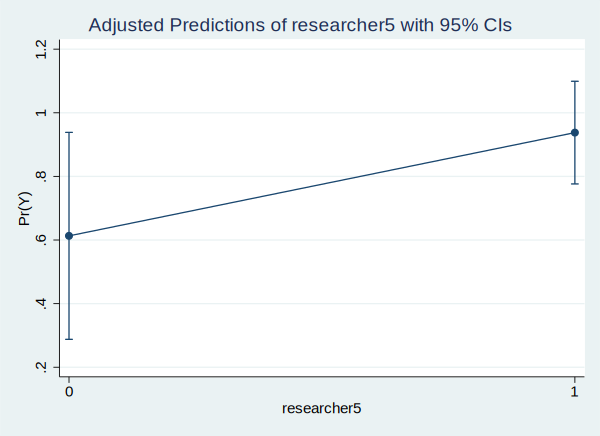

In [143]:
marginsplot

In [144]:
quietly logit y age gender marriage student1 company_man2 public_officer3 profession4 i.researcher5 learn income i.avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner i.saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride  i.a_cons_hac, nolog
margins, dydx(researcher5) at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3=0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 a_cons_hac=3)




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(y), predict()
dy/dx w.r.t. : 1.researcher5
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =           1
               club_jeju3      =           0
               ev_owner        =           0
               saving_free     =           1
               a_cons_sho~s    =           4
               a_cons_as       =           4
               a_cons_cha~e

#### avg_distance 

In [145]:
quietly logit y age gender marriage student1 company_man2 public_officer3 profession4 i.researcher5 learn income i.avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner i.saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride  i.a_cons_hac, nolog
margins avg_distance, at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3=0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 a_cons_hac=3)




Adjusted predictions                            Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(y), predict()
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =           1
               club_jeju3      =           0
               ev_owner        =           0
               saving_free     =           1
               a_cons_sho~s    =           4
               a_cons_as       =           4
               a_cons_cha~e    =           3
           


  Variables that uniquely identify margins: avg_distance


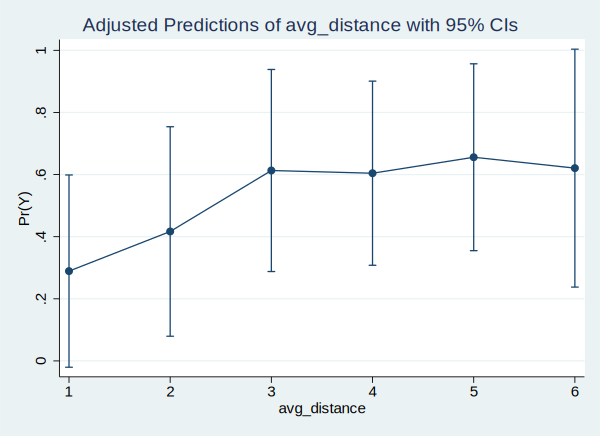

In [146]:
marginsplot

In [147]:
quietly logit y age gender marriage student1 company_man2 public_officer3 profession4 i.researcher5 learn income i.avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner i.saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride  i.a_cons_hac, nolog
margins, dydx(avg_distance) at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3=0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 a_cons_hac=3)




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(y), predict()
dy/dx w.r.t. : 2.avg_distance 3.avg_distance 4.avg_distance 5.avg_distance 6.avg_distance
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =           1
               club_jeju3      =           0
               ev_owner        =           0
               saving_free     =           1
               a_cons_sho~s    =           4
           

---
### saving_free 
---

In [148]:
* at mode
quietly logit y age gender marriage student1 company_man2 public_officer3 profession4 i.researcher5 learn income i.avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner i.saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride  i.a_cons_hac, nolog
margins saving_free, at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3=0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 a_cons_hac=3)




Adjusted predictions                            Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(y), predict()
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =           1
               club_jeju3      =           0
               ev_owner        =           0
               saving_free     =           1
               a_cons_sho~s    =           4
               a_cons_as       =           4
               a_cons_cha~e    =           3
           


  Variables that uniquely identify margins: saving_free


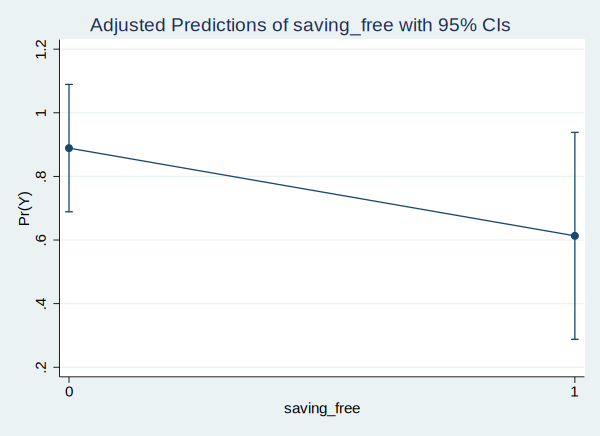

In [149]:
marginsplot

In [150]:
* at mode 
quietly logit y age gender marriage student1 company_man2 public_officer3 profession4 i.researcher5 learn income i.avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner i.saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride  i.a_cons_hac, nolog
margins, dydx(saving_free) at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3=0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 a_cons_hac=3)




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(y), predict()
dy/dx w.r.t. : 1.saving_free
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =           1
               club_jeju3      =           0
               ev_owner        =           0
               saving_free     =           1
               a_cons_sho~s    =           4
               a_cons_as       =           4
               a_cons_cha~e

---
### a_con_hac 
---

In [151]:
* Holding all variables at their mode values. The probability of y = 1 is
* 65% among respondents who "1"  
* 77% among respondents who "2"  
* 50% among respondents who "3"  
* 39% among respondents who "4"  
* 38% among respondents who "5"  
* a_con_hac is a categorical variable
quietly logit y age gender marriage student1 company_man2 public_officer3 profession4 i.researcher5 learn income i.avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner i.saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride  i.a_cons_hac, nolog
margin a_cons_hac, at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3=0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3)




Adjusted predictions                            Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(y), predict()
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =           1
               club_jeju3      =           0
               ev_owner        =           0
               saving_free     =           1
               a_cons_sho~s    =           4
               a_cons_as       =           4
               a_cons_cha~e    =           3
           


  Variables that uniquely identify margins: a_cons_hac


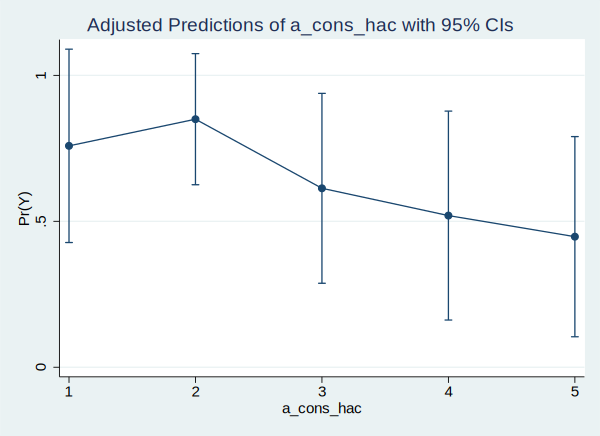

In [152]:
marginsplot

In [18]:
* Model1 total tabel: se and star cannot be together
 estimates table base model1 model2 model3 model4 model5 model6 model7 model8, b(%9.3f) star(0.01, 0.05, 0.1) eq(1) stats(ll) 


-----------------------------------------------------------------------------------------------------------------------------------------------------
    Variable |     base          model1         model2         model3         model4         model5         model6         model7         model8     
-------------+---------------------------------------------------------------------------------------------------------------------------------------
         age |     0.274          0.267          0.266          0.298          0.256          0.303          0.278          0.294          0.341     
      gender |    -0.002          0.034         -0.065          0.006          0.035         -0.007         -0.006          0.062          0.012     
    marriage |    -0.459         -0.444         -0.482         -0.398         -0.473         -0.514         -0.460         -0.498         -0.473     
    student1 |     0.345          0.294          0.362          0.509          0.397          0.317

In [16]:
estimates table base model1 model2 model3 model4 model5 model6 model7 model8, b(%9.3f) se(%9.3f) eq(1) stats(ll)


--------------------------------------------------------------------------------------------------------------------------
    Variable |   base       model1      model2      model3      model4      model5      model6      model7      model8    
-------------+------------------------------------------------------------------------------------------------------------
         age |     0.274       0.267       0.266       0.298       0.256       0.303       0.278       0.294       0.341  
             |     0.300       0.300       0.305       0.303       0.301       0.303       0.301       0.305       0.318  
      gender |    -0.002       0.034      -0.065       0.006       0.035      -0.007      -0.006       0.062       0.012  
             |     0.515       0.518       0.518       0.517       0.519       0.517       0.515       0.523       0.535  
    marriage |    -0.459      -0.444      -0.482      -0.398      -0.473      -0.514      -0.460      -0.498      -0.473  
             | 

---
# <font color = blue> 3. Before concern
---

In [132]:
* One concern series1. : b short distance

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free b_cons_short_dis,nolog
estimates store model1b



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      42.43
                                                Prob > chi2       =     0.0006
Log likelihood = -98.876549                     Pseudo R2         =     0.1766

----------------------------------------------------------------------------------
               y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------+----------------------------------------------------------------
             age |    .218625    .303361     0.72   0.471    -.3759517    .8132017
          gender |   .0622405   .5267541     0.12   0.906    -.9701784     1.09466
        marriage |  -.4679636   .4900693    -0.95   0.340    -1.428482    .4925547
        student1 |   .2191285   1.085342     0.20   0.840    -1.908104     2.34636
    company_man2 |  -2.284139   1.350393    -1.69   0.091     -4.93086    .3625818
 public_officer3 

In [133]:
* One concern series1. : b AS

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free b_cons_as, nolog
estimates store model2b



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      41.05
                                                Prob > chi2       =     0.0009
Log likelihood = -99.564882                     Pseudo R2         =     0.1709

---------------------------------------------------------------------------------
              y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
            age |   .2453737   .3048074     0.81   0.421    -.3520377    .8427851
         gender |  -.0469756   .5206701    -0.09   0.928     -1.06747     .973519
       marriage |   -.501071   .4891287    -1.02   0.306    -1.459746    .4576037
       student1 |   .5097782   1.076408     0.47   0.636    -1.599942    2.619498
   company_man2 |    -1.9948    1.32603    -1.50   0.132    -4.593771     .604172
public_officer3 |  -.0110

In [134]:
* One concern series1. : b charging fee

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free b_cons_charge_fee, nolog
estimates store model3b



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      37.81
                                                Prob > chi2       =     0.0026
Log likelihood = -101.18714                     Pseudo R2         =     0.1574

-----------------------------------------------------------------------------------
                y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------+----------------------------------------------------------------
              age |   .2600036   .3007311     0.86   0.387    -.3294185    .8494258
           gender |  -.0235503   .5142927    -0.05   0.963    -1.031545    .9844449
         marriage |  -.4076641   .4899139    -0.83   0.405    -1.367878    .5525494
         student1 |    .324157   1.067848     0.30   0.761    -1.768786      2.4171
     company_man2 |  -2.238329   1.338489    -1.67   0.094    -4.861719    .3850608
  public_

In [135]:
* One concern series1. : b charging facility lack

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free b_cons_num_charge_lack, nolog
estimates store model4b



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      37.21
                                                Prob > chi2       =     0.0032
Log likelihood = -101.48533                     Pseudo R2         =     0.1549

----------------------------------------------------------------------------------------
                     y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------------+----------------------------------------------------------------
                   age |   .2752197   .3010241     0.91   0.361    -.3147766    .8652161
                gender |  -.0286951   .5183838    -0.06   0.956    -1.044709    .9873185
              marriage |  -.4799121   .4863378    -0.99   0.324    -1.433117    .4732924
              student1 |   .3355041   1.065101     0.31   0.753    -1.752055    2.423063
          company_man2 |  -2.042688   1.310695    -1.56   

In [136]:
* One concern series1. : b charging time

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free b_cons_long_charge_time, nolog
estimates store model5b



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      41.15
                                                Prob > chi2       =     0.0009
Log likelihood = -99.514412                     Pseudo R2         =     0.1713

-----------------------------------------------------------------------------------------
                      y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
                    age |   .2447033   .3059363     0.80   0.424    -.3549208    .8443273
                 gender |  -.0225428    .522933    -0.04   0.966    -1.047473    1.002387
               marriage |  -.5534917   .4946596    -1.12   0.263    -1.523007    .4160233
               student1 |   .3565582   1.074111     0.33   0.740    -1.748661    2.461778
           company_man2 |  -1.994135   1.314315    

In [137]:
 * One concern series1. : b concern on hill side
 
 logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free b_cons_hill_ride, nolog
 estimates store model6b



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      37.90
                                                Prob > chi2       =     0.0025
Log likelihood = -101.13892                     Pseudo R2         =     0.1578

----------------------------------------------------------------------------------
               y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------+----------------------------------------------------------------
             age |   .2389226   .3047536     0.78   0.433    -.3583835    .8362287
          gender |  -.0019761   .5169982    -0.00   0.997    -1.015274    1.011322
        marriage |  -.4798643   .4887609    -0.98   0.326    -1.437818    .4780895
        student1 |   .3000294   1.077559     0.28   0.781    -1.811948    2.412007
    company_man2 |  -2.224047   1.321269    -1.68   0.092    -4.813688    .3655932
 public_officer3 

In [138]:
* One concern series1. : b concern on hvac
 
 logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free b_cons_hac, nolog
 estimates store model7b



Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      39.60
                                                Prob > chi2       =     0.0015
Log likelihood = -100.28838                     Pseudo R2         =     0.1649

---------------------------------------------------------------------------------
              y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
            age |   .2713536   .3001148     0.90   0.366    -.3168606    .8595678
         gender |  -.0179794   .5180803    -0.03   0.972    -1.033398    .9974393
       marriage |  -.5457615   .4934456    -1.11   0.269    -1.512897    .4213741
       student1 |   .0272473   1.096384     0.02   0.980    -2.121626    2.176121
   company_man2 |  -2.111383   1.319912    -1.60   0.110    -4.698363    .4755979
public_officer3 |  -.1114

In [139]:
* Total Before Model 

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free b_cons_short_dis b_cons_as b_cons_charge_fee b_cons_num_charge_lack b_cons_long_charge_time b_cons_hac b_cons_hill_ride, nolog
estimates store model8b



Logistic regression                             Number of obs     =        184
                                                LR chi2(23)       =      47.41
                                                Prob > chi2       =     0.0020
Log likelihood = -96.384988                     Pseudo R2         =     0.1974

-----------------------------------------------------------------------------------------
                      y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
                    age |   .2026883   .3077751     0.66   0.510    -.4005398    .8059164
                 gender |  -.0008958   .5372153    -0.00   0.999    -1.053818    1.052027
               marriage |  -.4896003   .5126346    -0.96   0.340    -1.494346    .5151452
               student1 |    .116532   1.126398     0.10   0.918    -2.091167    2.324231
           company_man2 |  -2.393867   1.406472    

In [38]:
* Model1 total before table: se and star cannot be together

estimates table base model1b model2b model3b model4b model5b model6b model7b model8b, b(%9.3f) star(0.01, 0.05, 0.1) eq(1) stats(ll)


-----------------------------------------------------------------------------------------------------------------------------------------------------
    Variable |     base         model1b        model2b        model3b        model4b        model5b        model6b        model7b        model8b     
-------------+---------------------------------------------------------------------------------------------------------------------------------------
         age |     0.274          0.219          0.245          0.260          0.275          0.245          0.239          0.271          0.203     
      gender |    -0.002          0.062         -0.047         -0.024         -0.029         -0.023         -0.002         -0.018         -0.001     
    marriage |    -0.459         -0.468         -0.501         -0.408         -0.480         -0.553         -0.480         -0.546         -0.490     
    student1 |     0.345          0.219          0.510          0.324          0.336          0.357

In [39]:
 estimates table base model1b model2b model3b model4b model5b model6b model7b model8b, b(%9.3f) se(%9.3f) eq(1) stats(ll)


--------------------------------------------------------------------------------------------------------------------------
    Variable |   base       model1b     model2b     model3b     model4b     model5b     model6b     model7b     model8b   
-------------+------------------------------------------------------------------------------------------------------------
         age |     0.274       0.219       0.245       0.260       0.275       0.245       0.239       0.271       0.203  
             |     0.300       0.303       0.305       0.301       0.301       0.306       0.305       0.300       0.308  
      gender |    -0.002       0.062      -0.047      -0.024      -0.029      -0.023      -0.002      -0.018      -0.001  
             |     0.515       0.527       0.521       0.514       0.518       0.523       0.517       0.518       0.537  
    marriage |    -0.459      -0.468      -0.501      -0.408      -0.480      -0.553      -0.480      -0.546      -0.490  
             | 

---
# <font color = blue> 4. Gap concernn
---

In [40]:
* One concern series1. : g short distance

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free g_cons_short_dis
estimates store model1g



Iteration 0:   log likelihood = -120.09018  
Iteration 1:   log likelihood = -101.74403  
Iteration 2:   log likelihood = -100.97846  
Iteration 3:   log likelihood = -100.96199  
Iteration 4:   log likelihood = -100.96193  
Iteration 5:   log likelihood = -100.96193  

Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      38.26
                                                Prob > chi2       =     0.0023
Log likelihood = -100.96193                     Pseudo R2         =     0.1593

----------------------------------------------------------------------------------
               y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------+----------------------------------------------------------------
             age |   .2681188   .3025017     0.89   0.375    -.3247736    .8610113
          gender |  -.0217995   .5178823    -0.04   0.966     -1.03683    .993

In [41]:
* One concern series1. : g AS

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free g_cons_as
estimates store model2g



Iteration 0:   log likelihood = -120.09018  
Iteration 1:   log likelihood = -102.30211  
Iteration 2:   log likelihood = -101.54333  
Iteration 3:   log likelihood = -101.52655  
Iteration 4:   log likelihood = -101.52649  
Iteration 5:   log likelihood = -101.52649  

Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      37.13
                                                Prob > chi2       =     0.0032
Log likelihood = -101.52649                     Pseudo R2         =     0.1546

---------------------------------------------------------------------------------
              y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
            age |   .2701295   .3001065     0.90   0.368    -.3180685    .8583275
         gender |   .0090316    .515626     0.02   0.986    -1.001577     1.01964


In [42]:
* One concern series1. : g charging fee

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free g_cons_charge_fee
estimates store model3g



Iteration 0:   log likelihood = -120.09018  
Iteration 1:   log likelihood = -102.09815  
Iteration 2:   log likelihood = -101.33524  
Iteration 3:   log likelihood = -101.31784  
Iteration 4:   log likelihood = -101.31778  
Iteration 5:   log likelihood = -101.31778  

Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      37.54
                                                Prob > chi2       =     0.0028
Log likelihood = -101.31778                     Pseudo R2         =     0.1563

-----------------------------------------------------------------------------------
                y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------+----------------------------------------------------------------
              age |   .2987924   .3033177     0.99   0.325    -.2956994    .8932843
           gender |   .0218543   .5181086     0.04   0.966    -.9936199   

In [43]:
* One concern series1. : g charging facility lack

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free g_cons_num_charge_lack
estimates store model4g



Iteration 0:   log likelihood = -120.09018  
Iteration 1:   log likelihood = -102.35129  
Iteration 2:   log likelihood = -101.60688  
Iteration 3:   log likelihood = -101.59045  
Iteration 4:   log likelihood = -101.59039  
Iteration 5:   log likelihood = -101.59039  

Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      37.00
                                                Prob > chi2       =     0.0034
Log likelihood = -101.59039                     Pseudo R2         =     0.1540

----------------------------------------------------------------------------------------
                     y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------------+----------------------------------------------------------------
                   age |   .2673953   .3016901     0.89   0.375    -.3239065    .8586971
                gender |   .0220581   .5263184     0.0

In [44]:
* One concern series1. : g charging time

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free g_cons_long_charge_time
estimates store model5g



Iteration 0:   log likelihood = -120.09018  
Iteration 1:   log likelihood = -102.21066  
Iteration 2:   log likelihood = -101.42774  
Iteration 3:   log likelihood = -101.41077  
Iteration 4:   log likelihood = -101.41071  
Iteration 5:   log likelihood = -101.41071  

Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      37.36
                                                Prob > chi2       =     0.0030
Log likelihood = -101.41071                     Pseudo R2         =     0.1555

-----------------------------------------------------------------------------------------
                      y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
                    age |   .2526962   .3027777     0.83   0.404    -.3407372    .8461295
                 gender |   -.002798   .5154976   

In [45]:
 * One concern series1. : g concern on hill side
 
 logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free g_cons_hill_ride
 estimates store model6g



Iteration 0:   log likelihood = -120.09018  
Iteration 1:   log likelihood = -102.28341  
Iteration 2:   log likelihood = -101.50905  
Iteration 3:   log likelihood = -101.49191  
Iteration 4:   log likelihood = -101.49185  
Iteration 5:   log likelihood = -101.49185  

Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      37.20
                                                Prob > chi2       =     0.0032
Log likelihood = -101.49185                     Pseudo R2         =     0.1549

----------------------------------------------------------------------------------
               y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------+----------------------------------------------------------------
             age |   .2526804   .3041088     0.83   0.406    -.3433618    .8487226
          gender |   .0016496   .5161134     0.00   0.997    -1.009914    1.01

In [46]:
 * One concern series1. : g concern on hvac
 
 logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3  ev_owner saving_free g_cons_hac
 estimates store model7g



Iteration 0:   log likelihood = -120.09018  
Iteration 1:   log likelihood =  -101.5966  
Iteration 2:   log likelihood = -100.85347  
Iteration 3:   log likelihood = -100.83845  
Iteration 4:   log likelihood = -100.83839  
Iteration 5:   log likelihood = -100.83839  

Logistic regression                             Number of obs     =        184
                                                LR chi2(17)       =      38.50
                                                Prob > chi2       =     0.0021
Log likelihood = -100.83839                     Pseudo R2         =     0.1603

---------------------------------------------------------------------------------
              y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
            age |    .288734   .3031969     0.95   0.341     -.305521     .882989
         gender |   .0438185   .5189288     0.08   0.933    -.9732632      1.0609


In [47]:
** gap concern

logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3   ev_owner saving_free g_cons_short_dis g_cons_as g_cons_charge_fee g_cons_num_charge_lack g_cons_long_charge_time g_cons_hill_ride g_cons_hac
estimates store model8g



Iteration 0:   log likelihood = -120.09018  
Iteration 1:   log likelihood =  -98.93757  
Iteration 2:   log likelihood =  -98.01825  
Iteration 3:   log likelihood = -97.999745  
Iteration 4:   log likelihood = -97.999695  
Iteration 5:   log likelihood = -97.999695  

Logistic regression                             Number of obs     =        184
                                                LR chi2(23)       =      44.18
                                                Prob > chi2       =     0.0050
Log likelihood = -97.999695                     Pseudo R2         =     0.1839

-----------------------------------------------------------------------------------------
                      y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
                    age |   .2288567   .3201341     0.71   0.475    -.3985946     .856308
                 gender |   .1815174   .5518584   

In [48]:
* Model1 total gap table: se and star cannot be together

estimates table base model1g model2g model3g model4g model5g model6g model7g model8g, b(%9.3f) star(0.01, 0.05, 0.1) eq(1) stats(ll)


-----------------------------------------------------------------------------------------------------------------------------------------------------
    Variable |     base         model1g        model2g        model3g        model4g        model5g        model6g        model7g        model8g     
-------------+---------------------------------------------------------------------------------------------------------------------------------------
         age |     0.274          0.268          0.270          0.299          0.267          0.253          0.253          0.289          0.229     
      gender |    -0.002         -0.022          0.009          0.022          0.022         -0.003          0.002          0.044          0.182     
    marriage |    -0.459         -0.474         -0.462         -0.473         -0.456         -0.448         -0.467         -0.417         -0.433     
    student1 |     0.345          0.361          0.368          0.445          0.367          0.365

In [49]:
 estimates table base model1g model2g model3g model4g model5g model6g model7g model8g, b(%9.3f) se(%9.3f) eq(1) stats(ll)


--------------------------------------------------------------------------------------------------------------------------
    Variable |   base       model1g     model2g     model3g     model4g     model5g     model6g     model7g     model8g   
-------------+------------------------------------------------------------------------------------------------------------
         age |     0.274       0.268       0.270       0.299       0.267       0.253       0.253       0.289       0.229  
             |     0.300       0.303       0.300       0.303       0.302       0.303       0.304       0.303       0.320  
      gender |    -0.002      -0.022       0.009       0.022       0.022      -0.003       0.002       0.044       0.182  
             |     0.515       0.518       0.516       0.518       0.526       0.515       0.516       0.519       0.552  
    marriage |    -0.459      -0.474      -0.462      -0.473      -0.456      -0.448      -0.467      -0.417      -0.433  
             | 

---
# <font color = blue> 5. All Models
---

In [50]:
** all after, before, gap

estimates table base model8 model8b model8g, b(%9.3f) star(0.01, 0.05, 0.1) eq(1) stats(ll)


--------------------------------------------------------------------------
    Variable |     base          model8        model8b        model8g     
-------------+------------------------------------------------------------
         age |     0.274          0.341          0.203          0.229     
      gender |    -0.002          0.012         -0.001          0.182     
    marriage |    -0.459         -0.473         -0.490         -0.433     
    student1 |     0.345          0.117          0.117          0.721     
company_man2 |    -2.067         -2.113         -2.394*        -1.851     
public_off~3 |    -0.032         -0.003         -0.117          0.274     
 profession4 |    -0.040         -0.521         -0.562          0.345     
 researcher5 |     2.122*         2.272*         2.236*         2.621**   
       learn |    -0.055          0.120          0.146         -0.019     
      income |     0.028          0.056          0.044          0.042     
avg_distance |     0.288

In [58]:
estimates table base model8 model8b model8g, eq(1) stats(ll)


------------------------------------------------------------------
    Variable |    base        model8      model8b      model8g    
-------------+----------------------------------------------------
         age |  .27433601    .34094403     .2026883    .22885667  
      gender | -.00157215    .01158954    -.0008958    .18151741  
    marriage | -.45902565   -.47313857   -.48960027   -.43299543  
    student1 |  .34500825    .11665415    .11653204    .72069001  
company_man2 | -2.0672433   -2.1127671   -2.3938666   -1.8509815  
public_off~3 | -.03150926   -.00256859   -.11676944    .27441597  
 profession4 |  -.0396948   -.52058398   -.56160082    .34528793  
 researcher5 |   2.121919     2.272473    2.2359377    2.6211054  
       learn | -.05483902    .12023159    .14628943   -.01872875  
      income |  .02757631    .05603638    .04401357     .0418953  
avg_distance |  .28818206    .28246135     .3448247    .27266202  
 freq_use_ev |  .03332234    .08671765   -.04770056    .08838

---
# <font color = blue> 6. Adding saving_free ev_owner: saving_free, researcher, avg_distance_a_cons_hac
---

In [59]:
logit y age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride a_cons_hac num_car saving_free ev_owner


Iteration 0:   log likelihood = -120.09018  
Iteration 1:   log likelihood = -97.234209  
Iteration 2:   log likelihood = -96.274852  
Iteration 3:   log likelihood = -96.261024  
Iteration 4:   log likelihood = -96.260986  
Iteration 5:   log likelihood = -96.260986  

Logistic regression                             Number of obs     =        184
                                                LR chi2(24)       =      47.66
                                                Prob > chi2       =     0.0028
Log likelihood = -96.260986                     Pseudo R2         =     0.1984

-----------------------------------------------------------------------------------------
                      y |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
                    age |   .3629497   .3302146     1.10   0.272     -.284259    1.010158
                 gender |   .0124888   .5355025    

---
# <font color = blue> 7. Order probit with after concern 
---

In [105]:
oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free, nolog 
estimates store base_o



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(16)       =      30.86
                                                Prob > chi2       =     0.0140
Log likelihood =  -273.5551                     Pseudo R2         =     0.0534

---------------------------------------------------------------------------------
     a_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
            age |   .0193158   .1335208     0.14   0.885    -.2423801    .2810118
         gender |   .2252427   .2451132     0.92   0.358    -.2551703    .7056557
       marriage |  -.0051852   .2146371    -0.02   0.981    -.4258661    .4154958
       student1 |  -1.087608   .4994205    -2.18   0.029    -2.066454   -.1087614
   company_man2 |  -.1792572   .5701841    -0.31   0.753    -1.296798    .9382831
public_officer3 |  -.0551

In [107]:
oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis, nolog
estimates store model1o



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      49.70
                                                Prob > chi2       =     0.0000
Log likelihood = -264.13723                     Pseudo R2         =     0.0860

----------------------------------------------------------------------------------
      a_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------+----------------------------------------------------------------
             age |   .0476201     .13472     0.35   0.724    -.2164263    .3116666
          gender |   .1516266   .2469204     0.61   0.539    -.3323285    .6355816
        marriage |  -.0357915   .2159372    -0.17   0.868    -.4590205    .3874375
        student1 |  -.9823696   .5065341    -1.94   0.052    -1.975158     .010419
    company_man2 |  -.2091682   .5759609    -0.36   0.716    -1.338031    .9196944
 public_officer3 

In [108]:
oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_as, nolog
estimates store model2o



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      49.48
                                                Prob > chi2       =     0.0001
Log likelihood = -264.24296                     Pseudo R2         =     0.0856

---------------------------------------------------------------------------------
     a_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
            age |    .021909   .1346898     0.16   0.871    -.2420781    .2858961
         gender |    .339882   .2478069     1.37   0.170    -.1458105    .8255745
       marriage |  -.0282188   .2157366    -0.13   0.896    -.4510549    .3946172
       student1 |  -1.149105   .5046309    -2.28   0.023    -2.138163   -.1600462
   company_man2 |  -.2415778   .5705992    -0.42   0.672    -1.359932    .8767762
public_officer3 |   .0280

In [111]:
oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_charge_fee, nolog
estimates store model3o



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      41.31
                                                Prob > chi2       =     0.0008
Log likelihood = -268.32914                     Pseudo R2         =     0.0715

-----------------------------------------------------------------------------------
       a_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------+----------------------------------------------------------------
              age |   .0023896   .1341525     0.02   0.986    -.2605445    .2653238
           gender |   .2459328   .2462188     1.00   0.318    -.2366473    .7285129
         marriage |  -.0584164   .2158698    -0.27   0.787    -.4815135    .3646807
         student1 |  -1.256179   .5061572    -2.48   0.013    -2.248229   -.2641291
     company_man2 |  -.3416472   .5751743    -0.59   0.553    -1.468968    .7856737
  public_

In [112]:
oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_num_charge_lack, nolog
estimates store model4o



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      38.23
                                                Prob > chi2       =     0.0023
Log likelihood =   -269.868                     Pseudo R2         =     0.0662

----------------------------------------------------------------------------------------
            a_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------------+----------------------------------------------------------------
                   age |   .0448945   .1346036     0.33   0.739    -.2189237    .3087128
                gender |   .1741649   .2464957     0.71   0.480    -.3089578    .6572876
              marriage |   .0059454   .2151953     0.03   0.978    -.4158296    .4277204
              student1 |  -1.193501   .5057725    -2.36   0.018    -2.184797    -.202205
          company_man2 |  -.2982034   .5720645    -0.52   

In [113]:
oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_long_charge_time, nolog
estimates store model5o



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      45.26
                                                Prob > chi2       =     0.0002
Log likelihood = -266.35774                     Pseudo R2         =     0.0783

-----------------------------------------------------------------------------------------
             a_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
                    age |  -.0268341   .1356328    -0.20   0.843    -.2926695    .2390013
                 gender |   .2431912    .245688     0.99   0.322    -.2383483    .7247308
               marriage |   .0498201   .2162127     0.23   0.818    -.3739489    .4735892
               student1 |  -1.072238   .5064514    -2.12   0.034    -2.064865   -.0796115
           company_man2 |  -.3108391   .5758247    

In [114]:
oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_hill_ride, nolog
estimates store model6o



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      72.63
                                                Prob > chi2       =     0.0000
Log likelihood =  -252.6716                     Pseudo R2         =     0.1257

----------------------------------------------------------------------------------
      a_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------+----------------------------------------------------------------
             age |   -.065919   .1358715    -0.49   0.628    -.3322222    .2003842
          gender |   .3072282   .2492903     1.23   0.218    -.1813718    .7958283
        marriage |  -.0860804   .2170671    -0.40   0.692     -.511524    .3393633
        student1 |  -.9315159   .5132601    -1.81   0.070    -1.937487    .0744553
    company_man2 |   .2874129   .5769876     0.50   0.618     -.843462    1.418288
 public_officer3 

In [115]:
oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
estimates store model7oall



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(22)       =     102.58
                                                Prob > chi2       =     0.0000
Log likelihood = -237.69745                     Pseudo R2         =     0.1775

-----------------------------------------------------------------------------------------
             a_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
                    age |  -.0663047   .1403809    -0.47   0.637    -.3414462    .2088367
                 gender |   .2925407   .2543287     1.15   0.250    -.2059344    .7910157
               marriage |  -.0980792   .2209631    -0.44   0.657    -.5311589    .3350005
               student1 |  -.9877176   .5341539    -1.85   0.064     -2.03464    .0592048
           company_man2 |   .0647339   .5919135    

---
# Ordered Probit: Predicted and Marginal Analysis
---
* saving_free
* a_cons_short
* a_cons_as
* a_cons_hill_ride
---

In [168]:
* (mean) The probability of opinion = 1 given that the rest of the variables are at their mean values is 7.17%
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, predict(outcome(1)) atmeans
margins, predict(outcome(2)) atmeans
margins, predict(outcome(3)) atmeans
margins, predict(outcome(4)) atmeans
margins, predict(outcome(5)) atmeans




Adjusted predictions                            Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==1), predict(outcome(1))
at           : age             =    2.326087 (mean)
               gender          =     .798913 (mean)
               marriage        =    .3967391 (mean)
               student1        =    .0543478 (mean)
               company_man2    =    .0271739 (mean)
               public_off~3    =    .4836957 (mean)
               profession4     =    .2771739 (mean)
               researcher5     =    .0923913 (mean)
               learn           =    3.217391 (mean)
               income          =    2.298913 (mean)
               avg_distance    =    3.293478 (mean)
               freq_use_ev     =    3.119565 (mean)
               club_kepco2     =    .5217391 (mean)
               club_jeju3      =    .2771739 (mean)
               ev_owner        =    .0978261 (mean)
               saving_free     =    .8913043 (mean)
            

In [160]:
* (mean) Margianl Effects y= 1
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(*) predict(outcome(1)) atmeans




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==1), predict(outcome(1))
dy/dx w.r.t. : age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack
               a_cons_long_charge_time a_cons_hill_ride
at           : age             =    2.326087 (mean)
               gender          =     .798913 (mean)
               marriage        =    .3967391 (mean)
               student1        =    .0543478 (mean)
               company_man2    =    .0271739 (mean)
               public_off~3    =    .4836957 (mean)
               profession4     =    .2771739 (mean)
               researcher5     =    .0923913 (mean)
               learn           =    3.217391 (mean)
               income          =    2.298913 (mean)
               avg_di

In [163]:
* (mean) Margianl Effects y=2
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(*) predict(outcome(2)) atmeans




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==2), predict(outcome(2))
dy/dx w.r.t. : age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack
               a_cons_long_charge_time a_cons_hill_ride
at           : age             =    2.326087 (mean)
               gender          =     .798913 (mean)
               marriage        =    .3967391 (mean)
               student1        =    .0543478 (mean)
               company_man2    =    .0271739 (mean)
               public_off~3    =    .4836957 (mean)
               profession4     =    .2771739 (mean)
               researcher5     =    .0923913 (mean)
               learn           =    3.217391 (mean)
               income          =    2.298913 (mean)
               avg_di

In [170]:
* (mean) Margianl Effects y=3
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(*) predict(outcome(3)) atmeans




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==3), predict(outcome(3))
dy/dx w.r.t. : age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack
               a_cons_long_charge_time a_cons_hill_ride
at           : age             =    2.326087 (mean)
               gender          =     .798913 (mean)
               marriage        =    .3967391 (mean)
               student1        =    .0543478 (mean)
               company_man2    =    .0271739 (mean)
               public_off~3    =    .4836957 (mean)
               profession4     =    .2771739 (mean)
               researcher5     =    .0923913 (mean)
               learn           =    3.217391 (mean)
               income          =    2.298913 (mean)
               avg_di

In [171]:
* (mean) Margianl Effects y=4
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(*) predict(outcome(4)) atmeans




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==4), predict(outcome(4))
dy/dx w.r.t. : age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack
               a_cons_long_charge_time a_cons_hill_ride
at           : age             =    2.326087 (mean)
               gender          =     .798913 (mean)
               marriage        =    .3967391 (mean)
               student1        =    .0543478 (mean)
               company_man2    =    .0271739 (mean)
               public_off~3    =    .4836957 (mean)
               profession4     =    .2771739 (mean)
               researcher5     =    .0923913 (mean)
               learn           =    3.217391 (mean)
               income          =    2.298913 (mean)
               avg_di

In [172]:
* (mean) Margianl Effects y=5
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(*) predict(outcome(5)) atmeans




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==5), predict(outcome(5))
dy/dx w.r.t. : age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack
               a_cons_long_charge_time a_cons_hill_ride
at           : age             =    2.326087 (mean)
               gender          =     .798913 (mean)
               marriage        =    .3967391 (mean)
               student1        =    .0543478 (mean)
               company_man2    =    .0271739 (mean)
               public_off~3    =    .4836957 (mean)
               profession4     =    .2771739 (mean)
               researcher5     =    .0923913 (mean)
               learn           =    3.217391 (mean)
               income          =    2.298913 (mean)
               avg_di

# Mode

In [173]:
* (mode) The probability of opinion = 1 given that the rest of the variables are at their mean values is 14.27%
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, predict(outcome(1))  at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 ) 
margins, predict(outcome(2))  at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 ) 
margins, predict(outcome(3))  at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 ) 
margins, predict(outcome(4))  at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 ) 
margins, predict(outcome(5))  at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 ) 





Adjusted predictions                            Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==1), predict(outcome(1))
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =           1
               club_jeju3      =           0
               ev_owner        =           0
               saving_free     =           1
               a_cons_sho~s    =           4
               a_cons_as       =           4
               a_cons_cha~e    =  

In [182]:
* (mode) marginal y=1
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(*) predict(outcome(1))  at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 ) 




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==1), predict(outcome(1))
dy/dx w.r.t. : age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack
               a_cons_long_charge_time a_cons_hill_ride
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
 

In [183]:
* (mode) marginal y=2
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(*) predict(outcome(2))  at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 ) 




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==2), predict(outcome(2))
dy/dx w.r.t. : age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack
               a_cons_long_charge_time a_cons_hill_ride
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
 

In [184]:
* (mode) marginal y=3
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(*) predict(outcome(3))  at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 ) 




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==3), predict(outcome(3))
dy/dx w.r.t. : age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack
               a_cons_long_charge_time a_cons_hill_ride
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
 

In [185]:
* (mode) marginal y=4
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(*) predict(outcome(4))  at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 ) 




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==4), predict(outcome(4))
dy/dx w.r.t. : age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack
               a_cons_long_charge_time a_cons_hill_ride
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
 

In [186]:
* (mode) marginal y=5
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(*) predict(outcome(5))  at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 ) 




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

Expression   : Pr(a_cons_hac==5), predict(outcome(5))
dy/dx w.r.t. : age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack
               a_cons_long_charge_time a_cons_hill_ride
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
 

---
### student1
---

In [177]:
* change from students 
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(student1) atmeans




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

dy/dx w.r.t. : student1
1._predict   : Pr(a_cons_hac==1), predict(pr outcome(1))
2._predict   : Pr(a_cons_hac==2), predict(pr outcome(2))
3._predict   : Pr(a_cons_hac==3), predict(pr outcome(3))
4._predict   : Pr(a_cons_hac==4), predict(pr outcome(4))
5._predict   : Pr(a_cons_hac==5), predict(pr outcome(5))
at           : age             =    2.326087 (mean)
               gender          =     .798913 (mean)
               marriage        =    .3967391 (mean)
               student1        =    .0543478 (mean)
               company_man2    =    .0271739 (mean)
               public_off~3    =    .4836957 (mean)
               profession4     =    .2771739 (mean)
               researcher5     =    .0923913 (mean)
               learn           =    3.217391 (mean)
               income          =    2.298913 (mean)
               avg_distance    =    3.293478 (mean)
               fr


  Variables that uniquely identify margins: _outcome


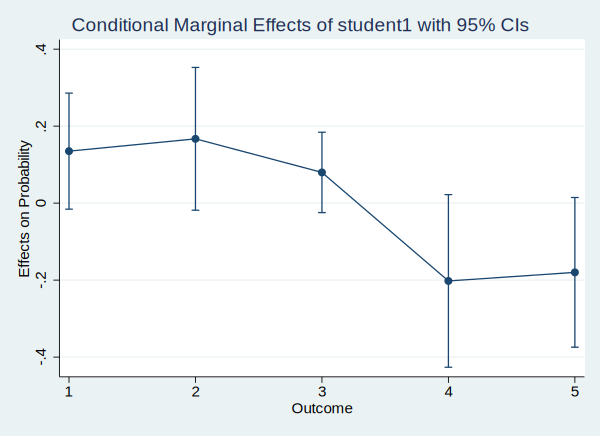

In [178]:
marginsplot

In [180]:
* (Mode) change from students 
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(student1) at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 )




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

dy/dx w.r.t. : student1
1._predict   : Pr(a_cons_hac==1), predict(pr outcome(1))
2._predict   : Pr(a_cons_hac==2), predict(pr outcome(2))
3._predict   : Pr(a_cons_hac==3), predict(pr outcome(3))
4._predict   : Pr(a_cons_hac==4), predict(pr outcome(4))
5._predict   : Pr(a_cons_hac==5), predict(pr outcome(5))
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =           1
    


  Variables that uniquely identify margins: _outcome


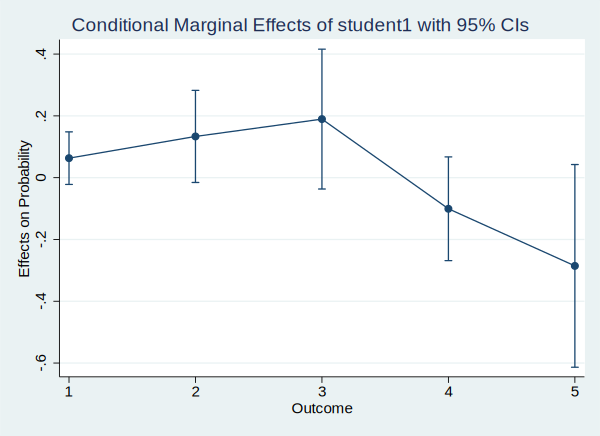

In [181]:
marginsplot

---
### a_cons_short
---

In [187]:
* mean marginal effect
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(a_cons_short) atmeans




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

dy/dx w.r.t. : a_cons_short_dis
1._predict   : Pr(a_cons_hac==1), predict(pr outcome(1))
2._predict   : Pr(a_cons_hac==2), predict(pr outcome(2))
3._predict   : Pr(a_cons_hac==3), predict(pr outcome(3))
4._predict   : Pr(a_cons_hac==4), predict(pr outcome(4))
5._predict   : Pr(a_cons_hac==5), predict(pr outcome(5))
at           : age             =    2.326087 (mean)
               gender          =     .798913 (mean)
               marriage        =    .3967391 (mean)
               student1        =    .0543478 (mean)
               company_man2    =    .0271739 (mean)
               public_off~3    =    .4836957 (mean)
               profession4     =    .2771739 (mean)
               researcher5     =    .0923913 (mean)
               learn           =    3.217391 (mean)
               income          =    2.298913 (mean)
               avg_distance    =    3.293478 (mean)
         


  Variables that uniquely identify margins: _outcome


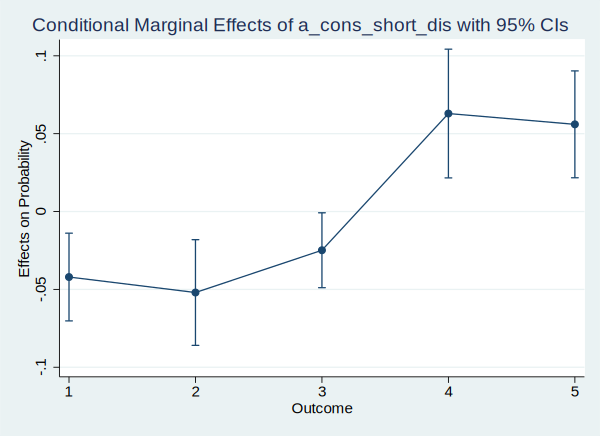

In [188]:
marginsplot

In [189]:
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(a_cons_short) at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 )




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

dy/dx w.r.t. : a_cons_short_dis
1._predict   : Pr(a_cons_hac==1), predict(pr outcome(1))
2._predict   : Pr(a_cons_hac==2), predict(pr outcome(2))
3._predict   : Pr(a_cons_hac==3), predict(pr outcome(3))
4._predict   : Pr(a_cons_hac==4), predict(pr outcome(4))
5._predict   : Pr(a_cons_hac==5), predict(pr outcome(5))
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =         


  Variables that uniquely identify margins: _outcome


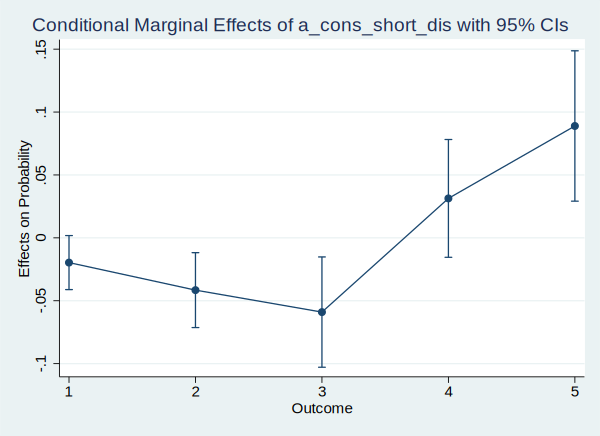

In [190]:
marginsplot

---
### a_cons_as
---

In [191]:
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(  a_cons_as  ) atmeans




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

dy/dx w.r.t. : a_cons_as
1._predict   : Pr(a_cons_hac==1), predict(pr outcome(1))
2._predict   : Pr(a_cons_hac==2), predict(pr outcome(2))
3._predict   : Pr(a_cons_hac==3), predict(pr outcome(3))
4._predict   : Pr(a_cons_hac==4), predict(pr outcome(4))
5._predict   : Pr(a_cons_hac==5), predict(pr outcome(5))
at           : age             =    2.326087 (mean)
               gender          =     .798913 (mean)
               marriage        =    .3967391 (mean)
               student1        =    .0543478 (mean)
               company_man2    =    .0271739 (mean)
               public_off~3    =    .4836957 (mean)
               profession4     =    .2771739 (mean)
               researcher5     =    .0923913 (mean)
               learn           =    3.217391 (mean)
               income          =    2.298913 (mean)
               avg_distance    =    3.293478 (mean)
               f


  Variables that uniquely identify margins: _outcome


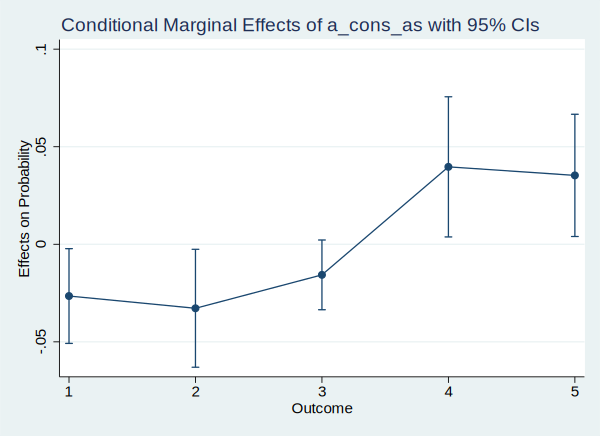

In [192]:
marginsplot

In [193]:
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(a_cons_as) at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 )




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

dy/dx w.r.t. : a_cons_as
1._predict   : Pr(a_cons_hac==1), predict(pr outcome(1))
2._predict   : Pr(a_cons_hac==2), predict(pr outcome(2))
3._predict   : Pr(a_cons_hac==3), predict(pr outcome(3))
4._predict   : Pr(a_cons_hac==4), predict(pr outcome(4))
5._predict   : Pr(a_cons_hac==5), predict(pr outcome(5))
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =           1
   


  Variables that uniquely identify margins: _outcome


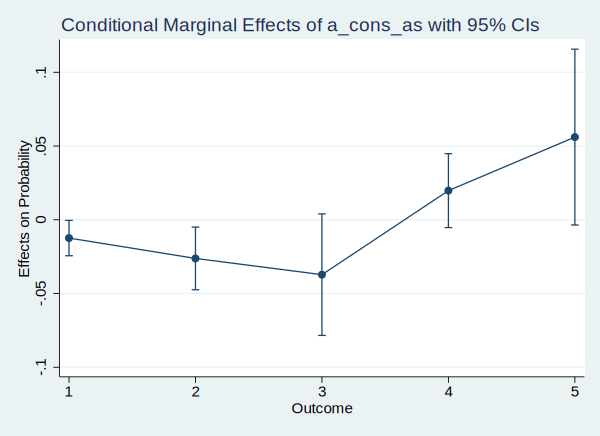

In [194]:
marginsplot

---
### a_cons_hill_ride
---

In [195]:
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(a_cons_hill_ride) atmeans




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

dy/dx w.r.t. : a_cons_hill_ride
1._predict   : Pr(a_cons_hac==1), predict(pr outcome(1))
2._predict   : Pr(a_cons_hac==2), predict(pr outcome(2))
3._predict   : Pr(a_cons_hac==3), predict(pr outcome(3))
4._predict   : Pr(a_cons_hac==4), predict(pr outcome(4))
5._predict   : Pr(a_cons_hac==5), predict(pr outcome(5))
at           : age             =    2.326087 (mean)
               gender          =     .798913 (mean)
               marriage        =    .3967391 (mean)
               student1        =    .0543478 (mean)
               company_man2    =    .0271739 (mean)
               public_off~3    =    .4836957 (mean)
               profession4     =    .2771739 (mean)
               researcher5     =    .0923913 (mean)
               learn           =    3.217391 (mean)
               income          =    2.298913 (mean)
               avg_distance    =    3.293478 (mean)
         


  Variables that uniquely identify margins: _outcome


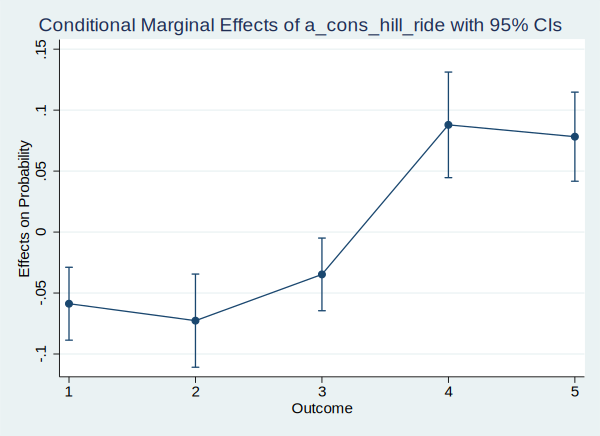

In [196]:
marginsplot

In [197]:
quietly: oprobit a_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free a_cons_short_dis a_cons_as a_cons_charge_fee a_cons_num_charge_lack a_cons_long_charge_time a_cons_hill_ride, nolog
margins, dydx(a_cons_hill_ride) at(age=2  gender=1 marriage=1 student1=0 company_man2=0 public_officer3=1 profession4 =0 researcher5=0 learn=3 income=2 avg_distance=3 freq_use_ev =3  club_kepco2=1  club_jeju3  =0 ev_owner =0  saving_free = 1 a_cons_short=4 a_cons_as = 4 a_cons_charge_fee=3 a_cons_num_charge_lack =5  a_cons_long_charge_time= 4 a_cons_hill_ride =3 )




Conditional marginal effects                    Number of obs     =        184
Model VCE    : OIM

dy/dx w.r.t. : a_cons_hill_ride
1._predict   : Pr(a_cons_hac==1), predict(pr outcome(1))
2._predict   : Pr(a_cons_hac==2), predict(pr outcome(2))
3._predict   : Pr(a_cons_hac==3), predict(pr outcome(3))
4._predict   : Pr(a_cons_hac==4), predict(pr outcome(4))
5._predict   : Pr(a_cons_hac==5), predict(pr outcome(5))
at           : age             =           2
               gender          =           1
               marriage        =           1
               student1        =           0
               company_man2    =           0
               public_off~3    =           1
               profession4     =           0
               researcher5     =           0
               learn           =           3
               income          =           2
               avg_distance    =           3
               freq_use_ev     =           3
               club_kepco2     =         


  Variables that uniquely identify margins: _outcome


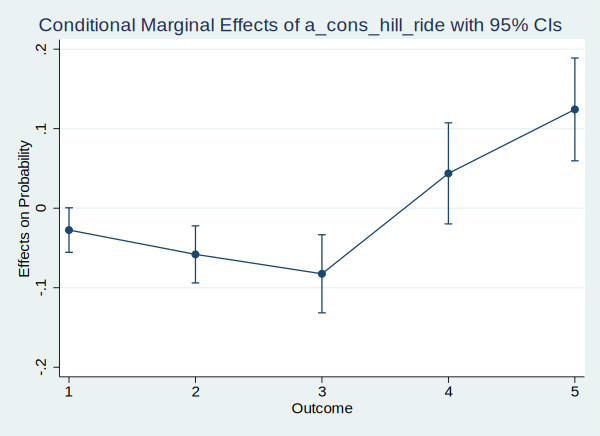

In [198]:
marginsplot

---
### Overall
---

In [68]:
estimates table base_o model1o  model2o model3o model4o  model5o model6o model7oall, b(%9.3f) star(0.01, 0.05, 0.1) eq(1) stats(ll)


--------------------------------------------------------------------------------------------------------------------------------------
    Variable |    base_o        model1o        model2o        model3o        model4o        model5o        model6o       model7oall   
-------------+------------------------------------------------------------------------------------------------------------------------
#1           |
         age |     0.019          0.048          0.022          0.002          0.045         -0.027         -0.066         -0.066     
      gender |     0.225          0.152          0.340          0.246          0.174          0.243          0.307          0.293     
    marriage |    -0.005         -0.036         -0.028         -0.058          0.006          0.050         -0.086         -0.098     
    student1 |    -1.088**       -0.982*        -1.149**       -1.256**       -1.194**       -1.072**       -0.932*        -0.988*    
company_man2 |    -0.179         -0.209

In [70]:
estimates table base_o model1o model2o model3o  model4o  model5o model6o model7oall ,  eq(1) stats(ll)


----------------------------------------------------------------------------------------------------------------------
    Variable |   base_o      model1o      model2o      model3o      model4o      model5o      model6o     model7oall  
-------------+--------------------------------------------------------------------------------------------------------
#1           |
         age |  .01931584    .04762013      .021909    .00238964    .04489453    -.0268341   -.06591898   -.06630475  
      gender |  .22524268    .15162658    .33988202    .24593281    .17416492    .24319121    .30722824    .29254068  
    marriage | -.00518517    -.0357915   -.02821881    -.0584164    .00594536    .04982013   -.08608036    -.0980792  
    student1 | -1.0876077   -.98236959   -1.1491046   -1.2561791    -1.193501    -1.072238   -.93151594   -.98771761  
company_man2 | -.17925718   -.20916816   -.24157777   -.34164718   -.29820344   -.31083913    .28741291    .06473394  
public_off~3 | -.05519985   -.16

---
# <font color = blue>  8. Order probit with gap concern 
---

In [209]:
oprobit g_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free, nolog 
estimates store base_og



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(16)       =      17.05
                                                Prob > chi2       =     0.3821
Log likelihood = -281.98369                     Pseudo R2         =     0.0294

---------------------------------------------------------------------------------
     g_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
            age |   .0437017    .132008     0.33   0.741    -.2150292    .3024326
         gender |   .1803827    .240235     0.75   0.453    -.2904692    .6512346
       marriage |   .1937332   .2120611     0.91   0.361    -.2218989    .6093654
       student1 |  -.0772974   .4839806    -0.16   0.873    -1.025882    .8712871
   company_man2 |   -.100128   .5580366    -0.18   0.858     -1.19386    .9936037
public_officer3 |   .0834

In [208]:
oprobit g_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free g_cons_short_dis, nolog
estimates store model1og



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      28.67
                                                Prob > chi2       =     0.0377
Log likelihood = -276.17612                     Pseudo R2         =     0.0493

----------------------------------------------------------------------------------
      g_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------+----------------------------------------------------------------
             age |   .0233628   .1325138     0.18   0.860    -.2363595    .2830851
          gender |   .1614849   .2409547     0.67   0.503    -.3107776    .6337474
        marriage |   .1755992   .2126573     0.83   0.409    -.2412015    .5923998
        student1 |  -.0369137   .4858007    -0.08   0.939    -.9890657    .9152382
    company_man2 |  -.1510718   .5591581    -0.27   0.787    -1.247001    .9448579
 public_officer3 

In [207]:
oprobit g_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free g_cons_as, nolog
estimates store model2og



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      26.52
                                                Prob > chi2       =     0.0655
Log likelihood = -277.25023                     Pseudo R2         =     0.0456

---------------------------------------------------------------------------------
     g_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
            age |   .0256869    .132397     0.19   0.846    -.2338065    .2851803
         gender |   .2257452   .2412034     0.94   0.349    -.2470048    .6984952
       marriage |   .1712495   .2125184     0.81   0.420    -.2452789    .5877778
       student1 |   .0177373   .4858183     0.04   0.971    -.9344491    .9699236
   company_man2 |  -.0739677     .55826    -0.13   0.895    -1.168137    1.020202
public_officer3 |   .1639

In [206]:
oprobit g_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free g_cons_charge_fee, nolog
estimates store model3og



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      17.82
                                                Prob > chi2       =     0.4005
Log likelihood = -281.60222                     Pseudo R2         =     0.0307

-----------------------------------------------------------------------------------
       g_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------+----------------------------------------------------------------
              age |   .0333336   .1325544     0.25   0.801    -.2264684    .2931355
           gender |   .1736156   .2403609     0.72   0.470    -.2974831    .6447143
         marriage |   .2028203   .2123262     0.96   0.339    -.2133314     .618972
         student1 |  -.1253719   .4872223    -0.26   0.797     -1.08031    .8295663
     company_man2 |  -.2059525   .5708089    -0.36   0.718    -1.324717    .9128124
  public_

In [205]:
oprobit g_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free g_cons_num_charge_lack, nolog 
estimates store model4og



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      24.20
                                                Prob > chi2       =     0.1140
Log likelihood = -278.40832                     Pseudo R2         =     0.0417

----------------------------------------------------------------------------------------
            g_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------------+----------------------------------------------------------------
                   age |   .0736468   .1326842     0.56   0.579    -.1864095    .3337031
                gender |   .0756476   .2437321     0.31   0.756    -.4020585    .5533536
              marriage |   .1688294   .2125745     0.79   0.427    -.2478089    .5854678
              student1 |  -.1832991   .4866252    -0.38   0.706    -1.137067    .7704688
          company_man2 |  -.1784844   .5591134    -0.32   

In [204]:
oprobit g_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free g_cons_long_charge_time, nolog
estimates store model5og



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      42.34
                                                Prob > chi2       =     0.0006
Log likelihood = -269.33913                     Pseudo R2         =     0.0729

-----------------------------------------------------------------------------------------
             g_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
                    age |  -.0374585   .1337118    -0.28   0.779    -.2995287    .2246117
                 gender |    .208573   .2416326     0.86   0.388    -.2650182    .6821642
               marriage |   .2144949   .2131068     1.01   0.314    -.2031868    .6321766
               student1 |   .0122879   .4868429     0.03   0.980    -.9419066    .9664824
           company_man2 |  -.1930681   .5620472    

In [203]:
oprobit g_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free g_cons_hill_ride, nolog
estimates store model6og



Ordered probit regression                       Number of obs     =        184
                                                LR chi2(17)       =      80.45
                                                Prob > chi2       =     0.0000
Log likelihood = -250.28379                     Pseudo R2         =     0.1385

----------------------------------------------------------------------------------
      g_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-----------------+----------------------------------------------------------------
             age |   -.166436   .1370399    -1.21   0.225    -.4350293    .1021572
          gender |   .3406769   .2452827     1.39   0.165    -.1400684    .8214221
        marriage |   .0972822   .2155191     0.45   0.652    -.3251276    .5196919
        student1 |   .0529926   .4929275     0.11   0.914    -.9131275    1.019113
    company_man2 |   -.240538   .5709077    -0.42   0.674    -1.359497    .8784205
 public_officer3 

In [79]:
** order all

oprobit g_cons_hac age gender marriage student1 company_man2 public_officer3 profession4 researcher5 learn income avg_distance freq_use_ev club_kepco2 club_jeju3 ev_owner saving_free g_cons_short_dis g_cons_as g_cons_charge_fee g_cons_num_charge_lack g_cons_long_charge_time g_cons_hill_ride
estimates store model7oallg



Iteration 0:   log likelihood = -290.51059  
Iteration 1:   log likelihood = -244.98002  
Iteration 2:   log likelihood = -244.27779  
Iteration 3:   log likelihood = -244.26825  
Iteration 4:   log likelihood = -244.26824  

Ordered probit regression                       Number of obs     =        184
                                                LR chi2(22)       =      92.48
                                                Prob > chi2       =     0.0000
Log likelihood = -244.26824                     Pseudo R2         =     0.1592

-----------------------------------------------------------------------------------------
             g_cons_hac |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
                    age |  -.1564773    .139277    -1.12   0.261    -.4294552    .1165007
                 gender |     .29795   .2504538     1.19   0.234    -.1929304    .7888304
     

In [80]:
*** ordered one table 
estimates table base_og model1og  model2og model3og model4og  model5og model6og model7oallg, b(%9.3f) star(0.01, 0.05, 0.1) eq(1) stats(ll)


--------------------------------------------------------------------------------------------------------------------------------------
    Variable |   base_og        model1og       model2og       model3og       model4og       model5og       model6og     model7oallg   
-------------+------------------------------------------------------------------------------------------------------------------------
#1           |
         age |     0.044          0.023          0.026          0.033          0.074         -0.037         -0.166         -0.156     
      gender |     0.180          0.161          0.226          0.174          0.076          0.209          0.341          0.298     
    marriage |     0.194          0.176          0.171          0.203          0.169          0.214          0.097          0.077     
    student1 |    -0.077         -0.037          0.018         -0.125         -0.183          0.012          0.053          0.158     
company_man2 |    -0.100         -0.151

In [82]:
estimates table base_og model1og model2og model3og  model4og  model5og model6og model7oallg , eq(1) stats(ll)


----------------------------------------------------------------------------------------------------------------------
    Variable |  base_og      model1og     model2og     model3og     model4og     model5og     model6og    model7oa~g  
-------------+--------------------------------------------------------------------------------------------------------
#1           |
         age |  .04370171    .02336282    .02568689    .03333355     .0736468   -.03745849   -.16643604   -.15647727  
      gender |  .18038271    .16148489    .22574517    .17361561    .07564757    .20857303    .34067685    .29795002  
    marriage |  .19373323    .17559916    .17124946    .20282031    .16882944    .21449492    .09728216     .0770572  
    student1 |  -.0772974   -.03691373    .01773725   -.12537193   -.18329909    .01228794    .05299255    .15816321  
company_man2 | -.10012799   -.15107179   -.07396768   -.20595255   -.17848439   -.19306812   -.24053803   -.14082099  
public_off~3 |  .08348661    .07

---
# <font color = blue>  9. Post Analysis
---

#### a_cons_hac
----

In [83]:
 tab a_cons_hac


 a_cons_hac |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         26       14.13       14.13
          2 |         27       14.67       28.80
          3 |         51       27.72       56.52
          4 |         47       25.54       82.07
          5 |         33       17.93      100.00
------------+-----------------------------------
      Total |        184      100.00


In [84]:
 tab b_cons_hac


 b_cons_hac |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         11        5.98        5.98
          2 |         25       13.59       19.57
          3 |         58       31.52       51.09
          4 |         51       27.72       78.80
          5 |         39       21.20      100.00
------------+-----------------------------------
      Total |        184      100.00


In [85]:
 tab g_cons_hac


 g_cons_hac |      Freq.     Percent        Cum.
------------+-----------------------------------
         -4 |          3        1.63        1.63
         -3 |          4        2.17        3.80
         -2 |         16        8.70       12.50
         -1 |         48       26.09       38.59
          0 |         76       41.30       79.89
          1 |         21       11.41       91.30
          2 |         14        7.61       98.91
          3 |          1        0.54       99.46
          4 |          1        0.54      100.00
------------+-----------------------------------
      Total |        184      100.00


In [ ]:
# Need to do more post analysis

# The following Part is the practice code
* For standard error check

In [86]:
eststo clear
eststo: qui logit y age
eststo: qui logit y age marriage	
eststo: qui logit y age marriage student1



(est1 stored)

(est2 stored)

(est3 stored)


In [87]:
%html
esttab, label title("table") html

This front-end or document format cannot display HTML

In [88]:
esttab, label title("table") 


table
--------------------------------------------------------------------
                              (1)             (2)             (3)   
                                y               y               y   
--------------------------------------------------------------------
y                                                                   
age                         0.233           0.151           0.145   
                           (1.21)          (0.64)          (0.61)   

marriage                                   -0.225          -0.228   
                                          (-0.58)         (-0.59)   

student1                                                    0.204   
                                                           (0.29)   

Constant                   0.0455           0.324           0.330   
                           (0.10)          (0.49)          (0.49)   
--------------------------------------------------------------------
Observations            

In [ ]:
#